In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

from IPython.display import display as dsp

In [32]:
raw = pd.read_csv('data/results.csv')
raw.dropna(inplace = True)
dsp(raw.head())

print(raw.columns)

print(raw.dtypes)

print(raw.shape)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
27,18.78,"Kim, Gyu Dae",15,50.33,M,30,89.52,W14,15,KOR,...,15,3.42,IL,62.72,8.98,41.82,39.65,USA,Champaign,84.75
36,19.37,"Gordian, Aaron",17,54.20,M,49,95.28,W17,17,MEX,...,18,3.65,AZ,66.62,8.93,44.82,42.47,USA,Phoenix,90.07
59,21.47,"Pulido, Jose Sr.",28,58.30,M,33,104.08,W27,28,MEX,...,34,3.98,GA,72.97,10.08,48.77,46.33,USA,Clarkesville,98.48
101,30.82,"Jami, Segundo O. Sr.",24,78.88,M,27,140.87,45,26,ECU,...,30,5.38,CO,95.97,15.23,66.28,62.78,USA,Boulder,132.67
110,32.53,"Sanca, Ruben",21,81.02,M,27,139.08,50,21,CPV,...,22,5.32,MA,97.65,16.23,68.42,64.95,USA,Lowell,131.40


Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')
10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object
(962, 21)


In [33]:
#Data Space
X = raw.select_dtypes(include = ['float', 'int'])

X['10k'] = raw['10k'].astype('float')
X['20k'] = raw['20k'].astype('float')

X.drop(columns = ['division', 'genderdiv', 'overall'], inplace = True)
X.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/alexander/.local/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

,age,official,pace,10k,20k
27,30,89.52,3.42,18.78,39.65
36,49,95.28,3.65,19.37,42.47
59,33,104.08,3.98,21.47,46.33
101,27,140.87,5.38,30.82,62.78
110,27,139.08,5.32,32.53,64.95


In [48]:
#K-Means clustering
X_norm = normalize(X)

#Check Typing
type(X_norm)

#Reduce to two components for visual analysis
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_norm)

In [64]:
#Define Validation
def cluster_validation(mod, X):
    
    #Generate four folds
    X1, X2, X3, X4 = train_test_split(X[int(len(X) / 2):], X[:int(len(X)/2)], test_size = 0.5)
    data = [X1, X2, X3, X4]
    
    #Get Centers
    centers = []
    for X in data:
        mod.fit(X)
        centers.append(mod.cluster_centers_)
    
    #Check the variance between each cluster center
    
    #Check descriptive statistics for each cluster

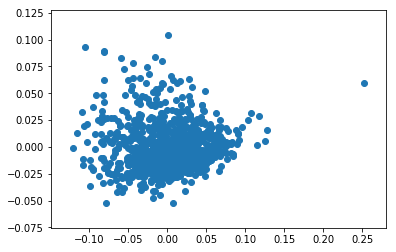

In [60]:
plt.scatter(X_pca[:,0], X_pca[:,1])

### Observation

Looks like one cluster, or two overlapping clusters of different densities, or many clusters of various densities and shapes. The interpretation can get pretty subjective, but there are ways we can validate the model.

Higher dimensions are harder to visualize.

[240, 241, 240, 241]
